### Libraries and Modules

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io, restoration, filters

# Modules
from RICM_VESICLE import RICM, Growth_Area

### Determine the movie details

In [2]:
EXPERIMENT  = '20220513_GUV_NTA3_on_SOPC3'                   # Experiment name
DATA        = 'vesicle_2_MMStack_Default_1'    # Image name
GUV         = 1                                          # Vesicle name
dt          = 0.538                                      # Actual time interval in seconds

### Read the RICM image for one GUV

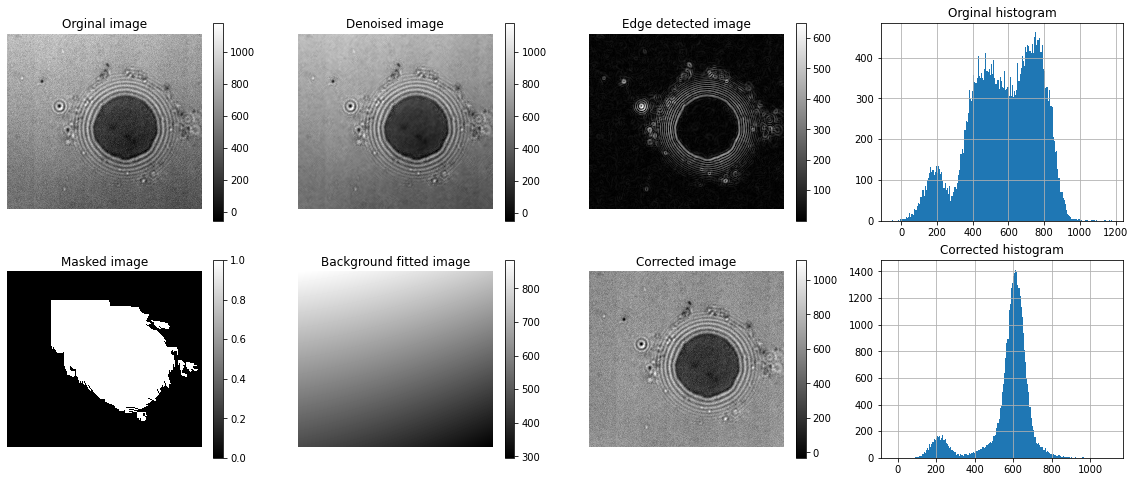

In [3]:
# Read the image
movie_guv = io.imread(f"Data/{EXPERIMENT}/data/{DATA}-{GUV}.tif")

# Subtract the base line
movie_guv = movie_guv - movie_guv[-100:-1].mean(axis = 0).min()

# Take the average
movie_guv_avg = movie_guv[-20:-1].mean(axis = 0)

# Define the RICM class with certain n_inner
ricm = RICM(movie_guv_avg, n_inner = 1.344, hole = 2)

# Display the way to the RICM height mapping step by step
ricm.show_summary()

### Measure the area of each frame

In [4]:
%time
# Define the growth area curve
growth = Growth_Area(movie_guv, background=ricm.background_fitting(), denoise=True, static_threshold=False, consecute=6)
area = growth.area_curve()

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.53 µs
(10000, 176, 195) --> (9990, 176, 195)


### Plot the growth curve

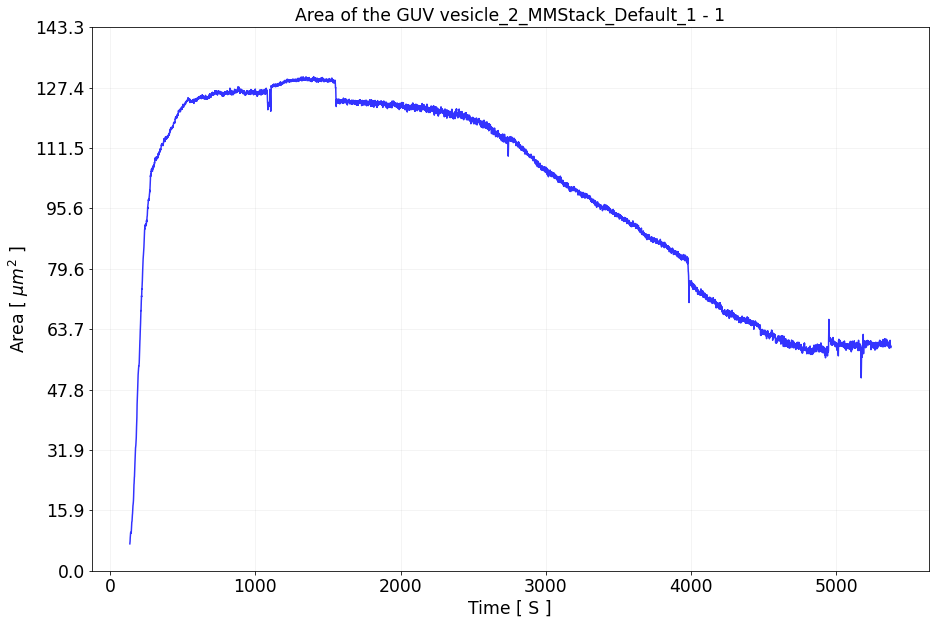

In [5]:
# Define the curve and the time interval
area_curve = area * 0.125**2
time = np.arange(0, area_curve.shape[0]*dt, dt)

# Define data frame for the scaled time and area
df1 = pd.DataFrame(data={'Time':time, 'Area':area_curve})

# Drop the ill-defined area points
df = df1.iloc[252:,:]

# Plot the curve
plt.figure(figsize=(15, 10))

plt.plot(df['Time'], df['Area'], label = f'{DATA}_{GUV}', color = 'b', alpha = 0.8)

plt.title(f'Area of the GUV {DATA} - {GUV}', fontsize= 'xx-large')
plt.xlabel('Time [ S ]', fontsize = "xx-large")
plt.ylabel('Area [ $\mu m^2$ ]', fontsize = "xx-large")
plt.xticks(fontsize = "xx-large")
plt.yticks(np.linspace(0, 1.1*area_curve[252:].max(),10), fontsize = "xx-large")
plt.ylim(0, np.max(df['Area']) * 1.1) 
plt.grid(color = 'gray', alpha = 0.1)

# Save the figure into png
plt.savefig(f"Data/{EXPERIMENT}/results/{DATA}-{GUV}")

# Save the data into csv
df.to_csv(f"Data/{EXPERIMENT}/results/{DATA}-{GUV}.csv", index=False)